In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"019bdf34-0604-7aa9-a193-536f025796ee\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Crop Sentinel Ai\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
# import jinja2
# raw_query = """
#     select * from "paddy_input_thresholds.csv";
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select* from paddy_input_thresholds LIMIT 20;
#     
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select distinct growth_stage from paddy_input_thresholds;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select count(*) as total_rows from paddy_input_thresholds;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     SELECT *,
#       CASE 
#         WHEN growth_stage=1 THEN 'seedling'
#         WHEN growth_stage=2 THEN 'vegetative'
#         WHEN growth_stage=3 THEN 'reproductive'
#         ELSE NULL
#       END AS growth_stage_name
#     FROM paddy_input_thresholds;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     SELECT *,
#       CASE
#         WHEN temperature BETWEEN 25 AND 33 THEN 'High_Risk'
#         WHEN temperature > 20 AND temperature < 37 THEN 'Medium_Risk'
#         WHEN temperature < 15 OR temperature >= 38 THEN 'Low_Risk'
#         ELSE 'No_Risk'
#       END AS risk_factor
#     FROM paddy_input_thresholds;
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select count(*) as total_high_risk from paddy_input_thresholds where label = 'seedling';
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select avg(temperature) as avg_temperature,
#            avg(humidity) as avg_humidity,
#            avg(rainfall) as avg_rainfall,
#            avg(ph) as avg_ph,
#            avg(soil_moisture) as avg_soil_moisture
#     from paddy_input_thresholds
#     where label = 'vegetative';
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
#read the data
df= pd.read_csv("paddy_input_thresholds.csv")
print(df.head())

    N   P   K  temperature  humidity        ph  rainfall label  soil_moisture  \
0  90  42  43     20.87974  82.00274  6.502985  202.9355  rice       29.44606   
1  85  58  41     21.77046  80.31964  7.038096  226.6555  rice       12.85118   
2  60  55  44     23.00446  82.32076  7.840207  263.9642  rice       29.36391   
3  74  35  40     26.49110  80.15836  6.980401  242.8640  rice       26.20773   
4  78  42  42     20.13017  81.60487  7.628473  262.7173  rice       28.23624   

   soil_type  ...  organic_matter  irrigation_frequency  crop_density  \
0          2  ...        3.121395                     4      11.74391   
1          3  ...        2.142021                     4      16.79710   
2          2  ...        1.474974                     1      12.65439   
3          3  ...        8.393907                     1      10.86436   
4          2  ...        5.202285                     3      13.85291   

   pest_pressure  fertilizer_usage  growth_stage  urban_area_proximity  \


In [ ]:
#eda
df.info()
df.size
df.shape
df.describe()
df.dtypes
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       100 non-null    int64  
 1   P                       100 non-null    int64  
 2   K                       100 non-null    int64  
 3   temperature             100 non-null    float64
 4   humidity                100 non-null    float64
 5   ph                      100 non-null    float64
 6   rainfall                100 non-null    float64
 7   label                   100 non-null    object 
 8   soil_moisture           100 non-null    float64
 9   soil_type               100 non-null    int64  
 10  sunlight_exposure       100 non-null    float64
 11  wind_speed              100 non-null    float64
 12  co2_concentration       100 non-null    float64
 13  organic_matter          100 non-null    float64
 14  irrigation_frequency    100 non-null    int

np.int64(0)

In [ ]:
#Data trasformation and feature engineering
df["growth_stage_avg_primary_thresholds"] = df.groupby("growth_stage")[["temperature", "humidity", "rainfall", "soil_moisture"]].transform("mean").mean(axis=1)
df["growth_stage_secondary_thresholds"]= df.groupby("growth_stage")[["crop_density", 'frost_risk', "wind_speed", "sunlight_exposure"]].transform("mean").mean(axis=1)
df["avg_npk_for_growth_stage"] = df.groupby("growth_stage")[["N", "P", "K"]].transform("mean").mean(axis=1)
df["avg_input_use_efficiency"] = df.groupby("growth_stage")[["fertilizer_usage", "water_usage_efficiency", "organic_matter", "irrigation_frequency", "co2_concentration"]].transform("mean").mean(axis=1)
df["risk_factor"]= df.groupby("growth_stage")["pest_pressure"].transform('sum')
df["pest_pressure_per_growth_stage"]= df.groupby("growth_stage")["pest_pressure"].transform("sum")
df["pest_risk_score"]= (
    0.45*df["growth_stage_avg_primary_thresholds"]+
    0.2*df["avg_npk_for_growth_stage"]+
    0.15*df["avg_input_use_efficiency"]+
    0.1*df["pest_pressure_per_growth_stage"]+
    0.1*df["growth_stage_secondary_thresholds"]
    )
df["risk_level"] = pd.cut(df["pest_risk_score"], bins=[0, 150, 220, float("inf")], labels=["Low", "Medium", "High"])
print(df.head())
print(df.isnull().sum())

    N   P   K  temperature  humidity        ph  rainfall label  soil_moisture  \
0  90  42  43     20.87974  82.00274  6.502985  202.9355  rice       29.44606   
1  85  58  41     21.77046  80.31964  7.038096  226.6555  rice       12.85118   
2  60  55  44     23.00446  82.32076  7.840207  263.9642  rice       29.36391   
3  74  35  40     26.49110  80.15836  6.980401  242.8640  rice       26.20773   
4  78  42  42     20.13017  81.60487  7.628473  262.7173  rice       28.23624   

   soil_type  ...  frost_risk  water_usage_efficiency  \
0          2  ...    95.64999                1.193293   
1          3  ...    77.26569                1.752672   
2          2  ...    18.19217                3.035541   
3          3  ...    82.81872                1.273341   
4          2  ...    25.46650                2.578671   

   growth_stage_avg_primary_thresholds  growth_stage_secondary_thresholds  \
0                            90.594457                          20.519835   
1               

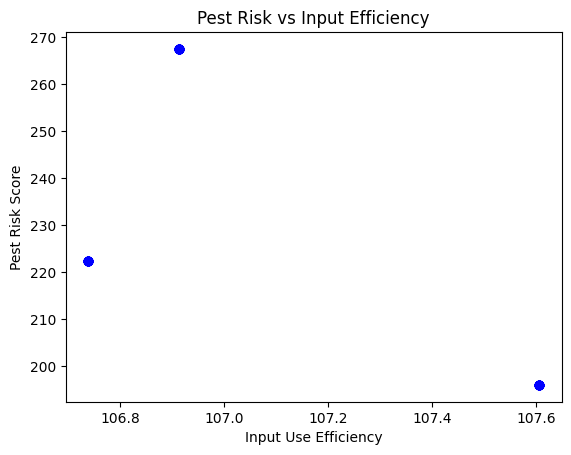

In [ ]:
import matplotlib as plt
import seaborn as sns
plt.pyplot.scatter(df["avg_input_use_efficiency"], df["pest_risk_score"], alpha=0.7, c="blue")
plt.pyplot.xlabel("Input Use Efficiency")
plt.pyplot.ylabel("Pest Risk Score")
plt.pyplot.title("Pest Risk vs Input Efficiency")
plt.pyplot.show()

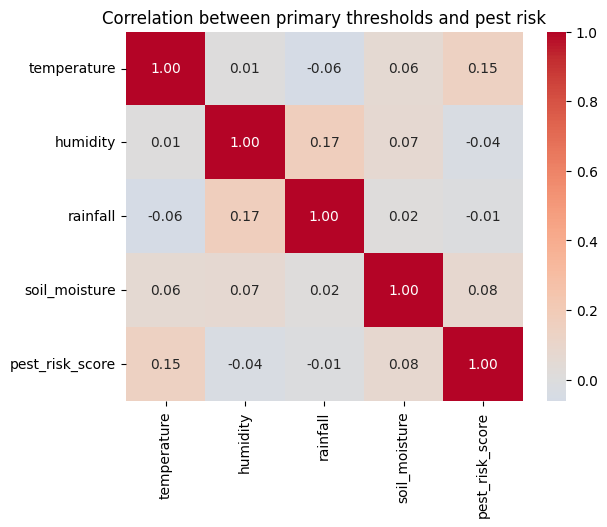

In [ ]:
corr_parms=  ["temperature", "humidity", "rainfall", "soil_moisture", "pest_risk_score"]

corr_matrix= df[corr_parms].corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
ax.set_title("Correlation between primary thresholds and pest risk")
import matplotlib.pyplot as plt
plt.show()

<Axes: >

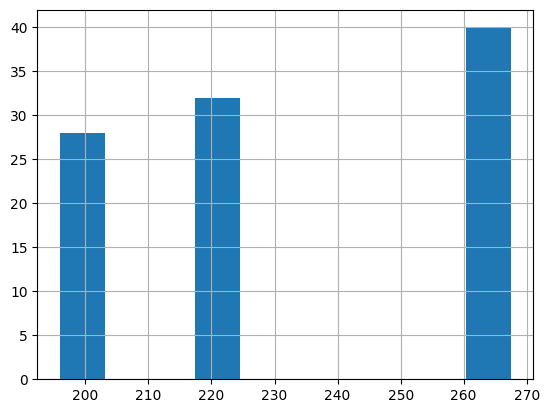

In [ ]:
df["pest_risk_score"].describe()
df["pest_risk_score"].hist()

In [ ]:
df["risk_level"] = pd.qcut(
    df["pest_risk_score"],
    q=3,
    labels=["Low", "Medium", "High"][:len(pd.qcut(df["pest_risk_score"], q=3, duplicates="drop").unique())],
    duplicates="drop"
)
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed',
       'co2_concentration', 'organic_matter', 'irrigation_frequency',
       'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage',
       'urban_area_proximity', 'water_source_type', 'frost_risk',
       'water_usage_efficiency', 'growth_stage_avg_primary_thresholds',
       'growth_stage_secondary_thresholds', 'avg_npk_for_growth_stage',
       'avg_input_use_efficiency', 'risk_factor',
       'pest_pressure_per_growth_stage', 'pest_risk_score', 'risk_level'],
      dtype='object')

In [ ]:
#ml_pipeline(classification)
#target is pest risk prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, roc_auc_score, confusion_matrix
#define features from preorocessed dataframe df
X = df.drop(columns=["pest_risk_score", "risk_level", "label"], axis=1)
y = df["risk_level"].cat.codes  # Convert risk_level categorical to numeric for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)
model= RandomForestClassifier()
pipeline= Pipeline([
    ("model", model)
])
#train the model
pipeline.fit(X_train, y_train)
#predict the model
y_pred= pipeline.predict(X_test)
#evaluate the model 
pipeline.eval= {
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred, average="weighted"),
    "precision": precision_score(y_test, y_pred, average="weighted"),
    "recall": recall_score(y_test, y_pred, average="weighted"),
    "roc_auc": roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1] if len(np.unique(y)) == 2 else pipeline.predict_proba(X_test), multi_class="ovr", average="weighted"),
    "confusion_matrix": confusion_matrix(y_test, y_pred)

}
print(pipeline.eval)

{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0, 'roc_auc': np.float64(1.0), 'confusion_matrix': array([[12,  0],
       [ 0,  8]])}


In [ ]:
#ml_pipeline_regression
#target yield prediction in paddy
#ml_pipeline(Regression)
#target is pest risk prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Define feature and target
# Fix: Remove missing 'avg_npk_use_efficiency' and 'growth_stage_avg_secondary_thresholds' from formula
#       Use only available columns for computation
#       (Assuming required columns exist in df)
df["yield"] = (
    0.3 * df["avg_input_use_efficiency"]
    + 0.2 * df["avg_npk_for_growth_stage"]
    + 0.3 * df["pest_risk_score"]
    + 0.2 * df["growth_stage_avg_primary_thresholds"]
    + np.random.normal(0, 0.05, len(df))
)
cat_cols= df.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols= df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "yield" in num_cols:
    num_cols.remove("yield")
from sklearn.compose import ColumnTransformer
Preprocessor= ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])
X= df.drop(columns=["yield"],axis=1)
y= df["yield"]
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
model= RandomForestRegressor()
pipeline= Pipeline([
    ("preprocessor", Preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)
#model prediction
y_pred= pipeline.predict(X_test)
#evaluate the model
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2: {r2_score(y_test, y_pred):.2f}")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", scores)
print("Mean R²:", scores.mean())



MSE: 0.00
MAE: 0.03
RMSE: 0.04
R2: 1.00
Cross-validation R² scores: [0.99997014 0.99997578 0.99996462 0.99998101 0.9999726 ]
Mean R²: 0.9999728284363313
